 <p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px"></p>

# Features Engineering


Int his chapter, we will learn how to create technical indicators by ourself and how to create them using the Techinal Analysis lirary.

### Summary
* Simple Moving Average (SMA)
* Moving Standard Deviation (MSD)
* Create other indictors using the Technical Analysis (ta) library

</br>

💰Join our community: https://discord.gg/wXjNPAc5BH

📚Read our book: https://www.amazon.com/gp/product/B09HG18CYL 

🖥️Quantreo's YouTube channel: https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw





In [ ]:
!pip install yfinance
!pip install ta

  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28718 sha256=f39ac996c57cbdcb2f3f1383914852d4db9b56f144ab42140226764f66156097
  Stored in directory: /root/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta


In [ ]:
import matplotlib as mpl
from matplotlib import cycler

colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')

# Import the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf

In [ ]:
# Import some data
df = yf.download("GOOG")
df.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Important**: The column names are different between the import using Yahoo Finance API or the import usinh MetaTrader5. Thus, to eliminate this problem, we will rename the necessary columns always with the same name. Here, we only need the Ajusted Close columns

In [ ]:
# Rename the columns
df = df[["Adj Close"]]
df.columns = ["close"]
df

,close
Date,
2004-08-19,49.982655
2004-08-20,53.952770
2004-08-23,54.495735
2004-08-24,52.239197
2004-08-25,52.802086
...,...
2021-11-08,2987.030029
2021-11-09,2984.969971
2021-11-10,2932.520020


# Simple Moving Average (SMA)

In [ ]:
# Simple moving average
df["SMA 15"] = df[["close"]].rolling(15).mean().shift(1)
df["SMA 60"] = df[["close"]].rolling(60).mean().shift(1)


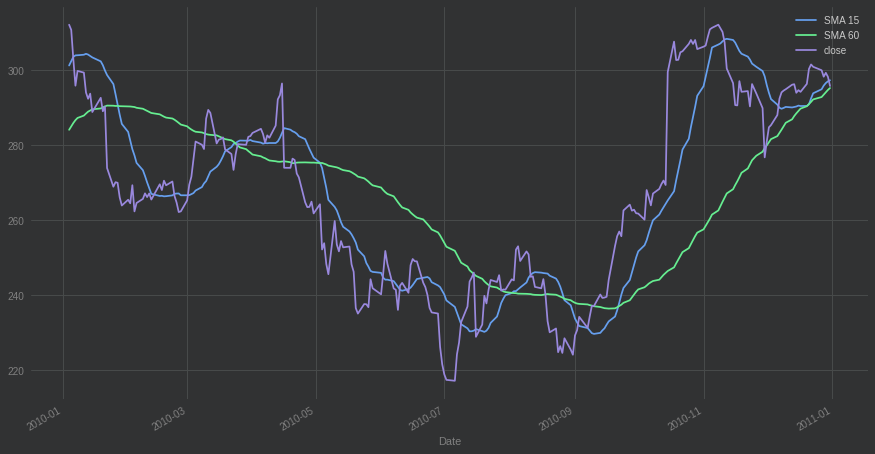

In [ ]:
df[["SMA 15", "SMA 60", "close"]].loc["2010"].plot(figsize=(15,8))

# Moving Standard Deviation (MSD)

In [ ]:
# Volatility of returns
df["returns"] = df["close"].pct_change(1)
df["MSD 15"] = df[["returns"]].rolling(15).std().shift(1)
df["MSD 60"] = df[["returns"]].rolling(60).std().shift(1)

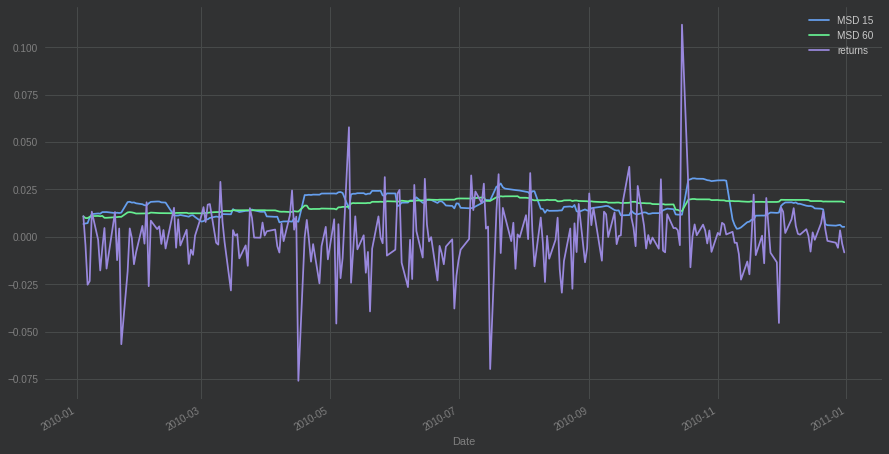

In [ ]:
df[["MSD 15", "MSD 60", "returns"]].loc["2010"].plot(figsize=(15,8))

# Technical Analysis (ta) library
https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html

You can check this link (offical ta documentation) if you want use another indicator. (This is not the ta-lib library, don't be mistaken)

In [ ]:
# Import ta library
import ta
RSI = ta.momentum.RSIIndicator(df["close"], window=14, fillna=False)
RSI

In [ ]:
df["rsi"] = RSI.rsi()

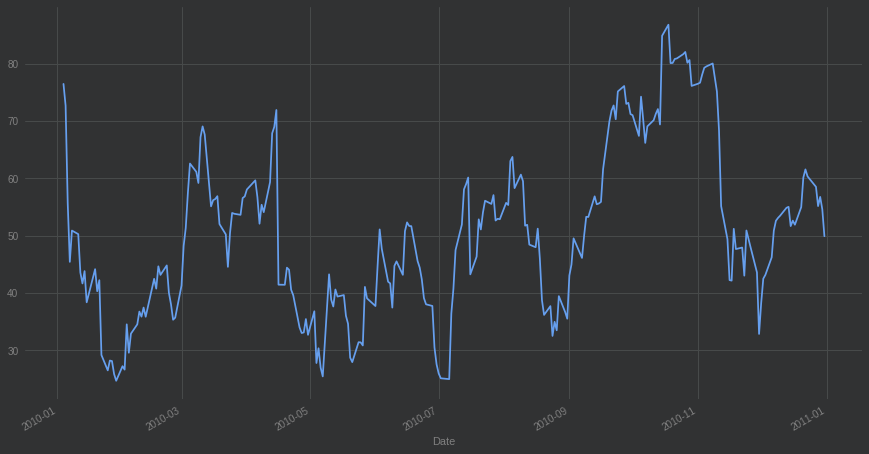

In [ ]:
df["rsi"].loc["2010"].plot(figsize=(15,8))

# CREATE A FUNCTION

In [ ]:
def feature_engineering(df):
    """ Create new variables"""
    
    # We copy the dataframe to avoid interferences in the data
    df_copy = df.copy()
    
    # Create the returns
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Create the SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Create the volatilities
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Create the Rsi
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi()
    
    return df_copy

In [ ]:
df = yf.download("GOOG")
df = df[["Adj Close"]]
df.columns = ["close"]

[*********************100%***********************]  1 of 1 completed


In [ ]:
feature_engineering(df)

,close,returns,SMA 15,SMA 60,MSD 10,MSD 30,rsi
Date,,,,,,,
2004-08-19,49.982655,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,53.952770,0.079430,NaN,NaN,NaN,NaN,NaN
2004-08-23,54.495735,0.010064,NaN,NaN,NaN,NaN,NaN
2004-08-24,52.239197,-0.041408,NaN,NaN,NaN,NaN,NaN
2004-08-25,52.802086,0.010775,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-11-08,2987.030029,0.000740,2885.634668,2831.296501,0.019377,0.017879,63.080263
2021-11-09,2984.969971,-0.000690,2894.156006,2834.944999,0.019390,0.017788,62.786726
2021-11-10,2932.520020,-0.017571,2901.391341,2838.389164,0.019565,0.016162,55.682186
